In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Train_Data.csv')
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def label(df,cols):
    for col in cols:
        df[col] = le.fit_transform(df[col])
    return df
def onhot(df,col):
    df_dummy = pd.get_dummies(df[col])
    df = pd.concat([df,df_dummy],axis=1)
    df.drop(col,axis=1,inplace = True)
    return df
    
cols = ['sex','smoker']
df = label(df,cols)
df = onhot(df,'region')
df

,age,sex,bmi,smoker,children,charges,northeast,northwest,southeast,southwest
0,21.000000,1,25.745000,0,2,3279.868550,1,0,0,0
1,36.976978,0,25.744165,1,3,21454.494239,0,0,1,0
2,18.000000,1,30.030000,0,1,1720.353700,0,0,1,0
3,37.000000,1,30.676891,0,3,6801.437542,1,0,0,0
4,58.000000,1,32.010000,0,1,11946.625900,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3625,48.820767,0,41.426984,0,4,10987.324964,0,1,0,0
3626,38.661977,0,26.202557,0,2,11735.844352,0,0,1,0
3627,56.000000,1,40.300000,0,0,10602.385000,0,0,0,1
3628,48.061207,0,34.930624,0,1,8976.140452,0,0,1,0


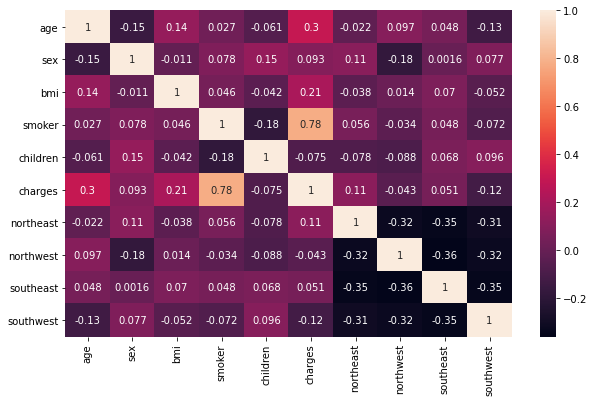

In [7]:
fig, ax = plt.subplots(figsize=(10,6))   
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
X = df.drop('charges',axis=1)
y = df['charges']

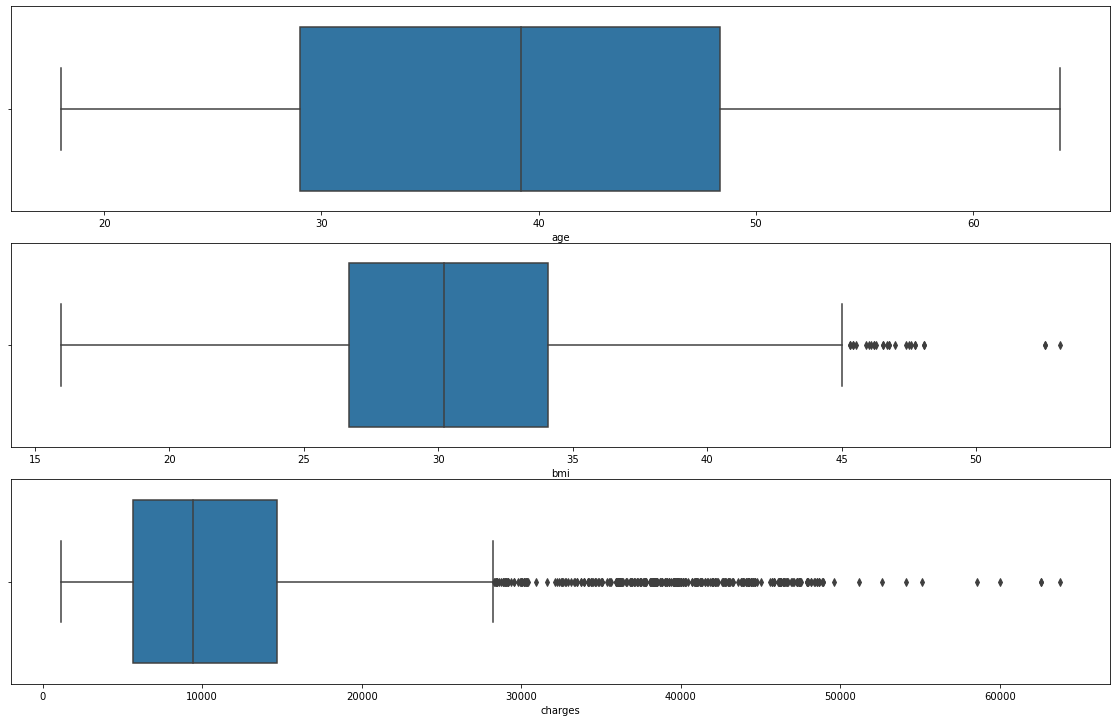

In [57]:
f, ax = plt.subplots(3, 1, figsize=(16,10))
f.tight_layout()
ax1,ax2,ax3 = ax.flatten()
sns.boxplot(x = X['age'], ax=ax1)
sns.boxplot(x = X['bmi'], ax=ax2)
sns.boxplot(x = y, ax=ax3)

In [60]:
df_50 = df[df['bmi']>45]
df_50.shape

(28, 10)

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
# linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

#Linear regression
lin_reg = LinearRegression(normalize=False)
lin_reg.fit(x_train, y_train)
y_predict_lin_reg = lin_reg.predict(x_val)
print(lin_reg.score(x_val,y_val))

#Lasso
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(x_train, y_train)
y_predict_lasso = lasso.predict(x_val)
print(lasso.score(x_val,y_val))

#Ridge
ridge = Ridge(alpha=0.1, normalize=False)
ridge.fit(x_train, y_train)
y_predict_ridge = ridge.predict(x_val)
print(ridge.score(x_val,y_val))
print('Linear: ', mean_squared_error(y_val, y_predict_lin_reg, squared=False),'\n',
      'Lasso: ', mean_squared_error(y_val, y_predict_lasso, squared=False),'\n',
      'Ridge:', mean_squared_error(y_val, y_predict_ridge, squared=False))

0.7208780517032731
0.7208750114499538
0.720860957696954
Linear:  5670.859881750769 
 Lasso:  5670.89076574921 
 Ridge: 5671.033526695433


In [11]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter for n_estimators
param_grid = {'n_estimators': np.arange(5,20)}
randForest = RandomForestRegressor()

randForest_cv = GridSearchCV(randForest, param_grid, cv=5)
randForest_cv.fit(x_train, y_train)
randForest_cv.best_params_

{'n_estimators': 17}

In [12]:
y_predict_randForest_cv = randForest_cv.predict(x_val)
print('randForest_cv:', mean_squared_error(y_val, y_predict_randForest_cv, squared=False))

randForest_cv: 3458.6040608386124


In [72]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter for n_neighbors
param_grid = {'n_neighbors': np.arange(1,20)}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train, y_train)
knn_cv.best_params_

{'n_neighbors': 2}

In [73]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(x_train, y_train)

y_predict_KNN = knn.predict(x_val)
print('KNN:', mean_squared_error(y_val, y_predict_KNN, squared=False))

KNN: 7338.626801359953


### Test Data

In [13]:
test = pd.read_csv('Test_Data.csv')
test.head()

,age,sex,bmi,smoker,region,children
0,40.000000,male,29.900000,no,southwest,2
1,47.000000,male,32.300000,no,southwest,1
2,54.000000,female,28.880000,no,northeast,2
3,37.000000,male,30.568094,no,northeast,3
4,59.130049,male,33.132854,yes,northeast,4


In [14]:
test = label(test,['sex','smoker'])
test = onhot(test,'region')
test

,age,sex,bmi,smoker,children,northeast,northwest,southeast,southwest
0,40.000000,1,29.900000,0,2,0,0,0,1
1,47.000000,1,32.300000,0,1,0,0,0,1
2,54.000000,0,28.880000,0,2,1,0,0,0
3,37.000000,1,30.568094,0,3,1,0,0,0
4,59.130049,1,33.132854,1,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...
487,51.000000,1,27.740000,0,1,1,0,0,0
488,33.000000,1,42.400000,0,5,0,0,0,1
489,47.769999,1,29.064615,0,4,1,0,0,0
490,41.530738,0,24.260852,0,5,0,0,1,0


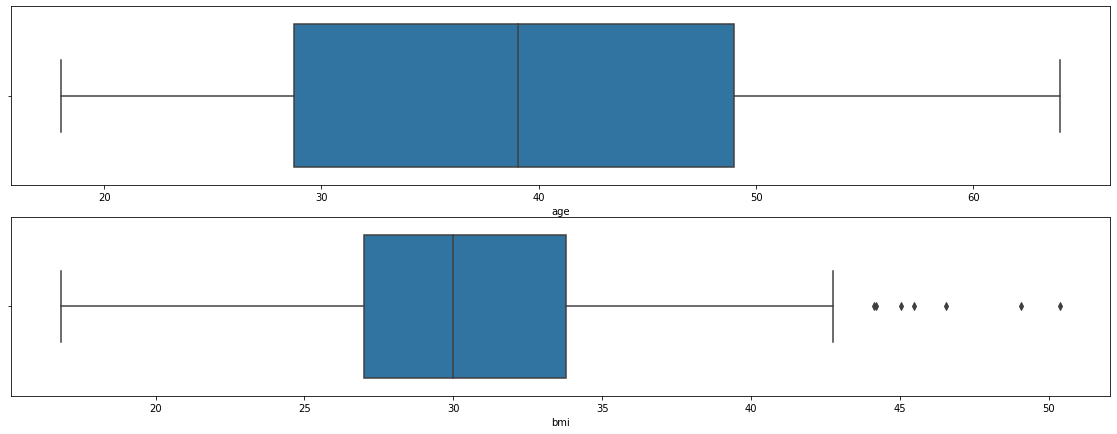

In [66]:
X_test = test.loc[:,['age','bmi','smoker_yes']]

f, ax = plt.subplots(2, 1, figsize=(16,6))
f.tight_layout()
ax1,ax2 = ax.flatten()
sns.boxplot(x = X_test['age'], ax=ax1)
sns.boxplot(x = X_test['bmi'], ax=ax2)

In [16]:
y_predict_test = randForest_cv.predict(test)

In [23]:
res = pd.DataFrame(y_predict_test)
res.index = test.index
res.columns = ['prediction']
res.to_csv("prediction_results.csv", index = False) 

In [21]:
res

,charges
0,7611.284452
1,8495.140012
2,12662.521277
3,6867.694874
4,42806.304208
...,...
487,16291.943357
488,6939.582223
489,13715.892624
490,9224.712197
